In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
cid=pd.read_csv('adult_data.csv',header=None)
cid

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
# hide the index column of the dataset
#cid.style.hide_index()

In [4]:
# Mapping the column name for each column
cid.columns=['Age','WorkClass','fnlwgt','Education','Education_num','Marital_status','Occupation','RalationShip','Race','Sex','Capital_gain','Capital_loss','Per_hr_week','Native_Country','Pr']
cid

,Age,WorkClass,fnlwgt,Education,Education_num,Marital_status,Occupation,RalationShip,Race,Sex,Capital_gain,Capital_loss,Per_hr_week,Native_Country,Pr
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
# count no of employee less than 50k salary and no of employee more than 50k salary
cid['Pr'].value_counts()

 <=50K    24720
 >50K      7841
Name: Pr, dtype: int64

In [6]:
# Converting all the object data types into integer data type 
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
cid['WorkClass']=le.fit_transform(cid['WorkClass'])
cid['Education']=le.fit_transform(cid['Education'])
cid['Marital_status']=le.fit_transform(cid['Marital_status'])
cid['Occupation']=le.fit_transform(cid['Occupation'])
cid['RalationShip']=le.fit_transform(cid['RalationShip'])
cid['Race']=le.fit_transform(cid['Race'])
cid['Sex']=le.fit_transform(cid['Sex'])
cid['Native_Country']=le.fit_transform(cid['Native_Country'])
cid['Pr']=le.fit_transform(cid['Pr'])

In [7]:
# now we have all the data in numeric/integer format for making the model
cid.head(10)

,Age,WorkClass,fnlwgt,Education,Education_num,Marital_status,Occupation,RalationShip,Race,Sex,Capital_gain,Capital_loss,Per_hr_week,Native_Country,Pr
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
5,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,0
6,49,4,160187,6,5,3,8,1,2,0,0,0,16,23,0
7,52,6,209642,11,9,2,4,0,4,1,0,0,45,39,1
8,31,4,45781,12,14,4,10,1,4,0,14084,0,50,39,1
9,42,4,159449,9,13,2,4,0,4,1,5178,0,40,39,1


In [8]:
# finding the missing values in the data set
cid.isnull().sum()

Age               0
WorkClass         0
fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
RalationShip      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Per_hr_week       0
Native_Country    0
Pr                0
dtype: int64

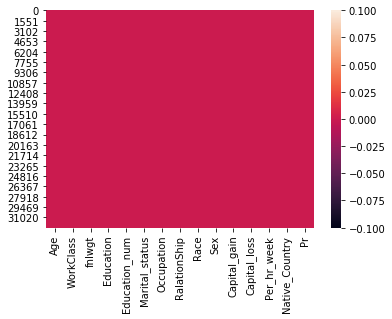

In [9]:
# It shows that there is no null values present in the data set
sns.heatmap(cid.isnull())

In [10]:
# finding Statistical descreption of the data
cid.describe()

,Age,WorkClass,fnlwgt,Education,Education_num,Marital_status,Occupation,RalationShip,Race,Sex,Capital_gain,Capital_loss,Per_hr_week,Native_Country,Pr
count,32561.000000,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,3.868892,1.897784e+05,10.298210,10.080679,2.611836,6.572740,1.446362,3.665858,0.669205,1077.648844,87.303830,40.437456,36.718866,0.240810
std,13.640433,1.455960,1.055500e+05,3.870264,2.572720,1.506222,4.228857,1.606771,0.848806,0.470506,7385.292085,402.960219,12.347429,7.823782,0.427581
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,4.000000,1.178270e+05,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,39.000000,0.000000
50%,37.000000,4.000000,1.783560e+05,11.000000,10.000000,2.000000,7.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,39.000000,0.000000
75%,48.000000,4.000000,2.370510e+05,12.000000,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,39.000000,0.000000
max,90.000000,8.000000,1.484705e+06,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000


In [11]:
# Finding coorelation of the data
cid.corr()

,Age,WorkClass,fnlwgt,Education,Education_num,Marital_status,Occupation,RalationShip,Race,Sex,Capital_gain,Capital_loss,Per_hr_week,Native_Country,Pr
Age,1.000000,0.003787,-0.076646,-0.010508,0.036527,-0.266288,-0.020947,-0.263698,0.028718,0.088832,0.077674,0.057775,0.068756,-0.001151,0.234037
WorkClass,0.003787,1.000000,-0.016656,0.023513,0.052085,-0.064731,0.254892,-0.090461,0.049742,0.095981,0.033835,0.012216,0.138962,-0.007690,0.051604
fnlwgt,-0.076646,-0.016656,1.000000,-0.028145,-0.043195,0.028153,0.001597,0.008931,-0.021291,0.026858,0.000432,-0.010252,-0.018768,-0.051966,-0.009463
Education,-0.010508,0.023513,-0.028145,1.000000,0.359153,-0.038407,-0.021260,-0.010876,0.014131,-0.027356,0.030046,0.016746,0.055510,0.064288,0.079317
Education_num,0.036527,0.052085,-0.043195,0.359153,1.000000,-0.069304,0.109697,-0.094153,0.031838,0.012280,0.122630,0.079923,0.148123,0.050840,0.335154
Marital_status,-0.266288,-0.064731,0.028153,-0.038407,-0.069304,1.000000,-0.009654,0.185451,-0.068013,-0.129314,-0.043393,-0.034187,-0.190519,-0.023819,-0.199307
Occupation,-0.020947,0.254892,0.001597,-0.021260,0.109697,-0.009654,1.000000,-0.075607,0.006763,0.080296,0.025505,0.017987,0.080383,-0.012543,0.075468
RalationShip,-0.263698,-0.090461,0.008931,-0.010876,-0.094153,0.185451,-0.075607,1.000000,-0.116055,-0.582454,-0.057919,-0.061062,-0.248974,-0.005507,-0.250918
Race,0.028718,0.049742,-0.021291,0.014131,0.031838,-0.068013,0.006763,-0.116055,1.000000,0.087204,0.011145,0.018899,0.041910,0.137852,0.071846
Sex,0.088832,0.095981,0.026858,-0.027356,0.012280,-0.129314,0.080296,-0.582454,0.087204,1.000000,0.048480,0.045567,0.229309,-0.008119,0.215980


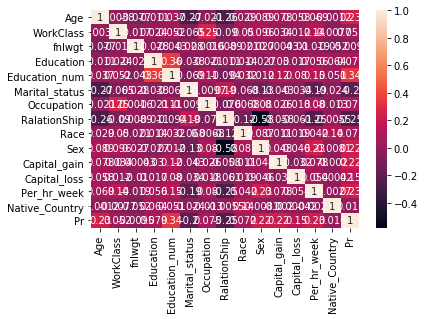

In [12]:
sns.heatmap(cid.corr(),annot=True)

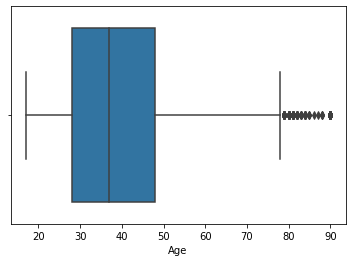

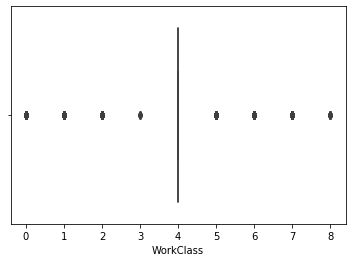

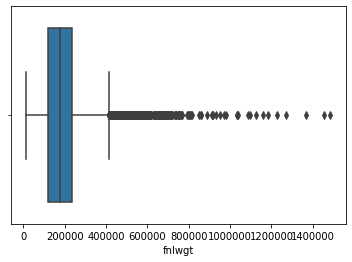

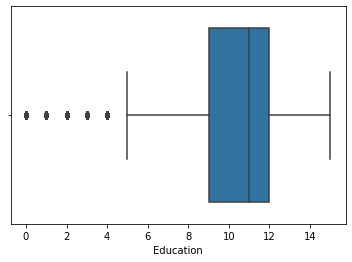

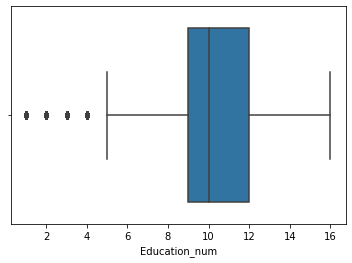

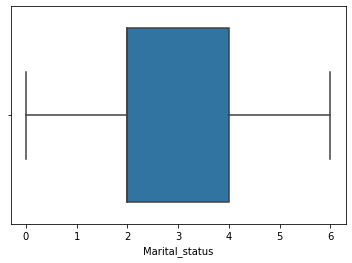

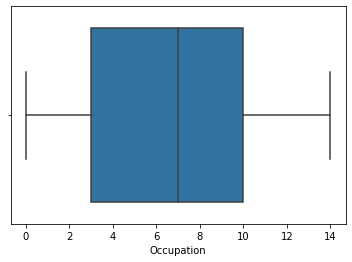

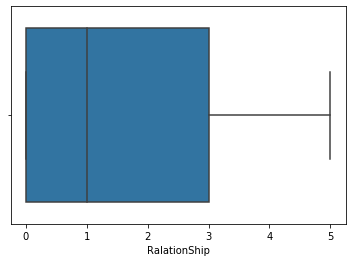

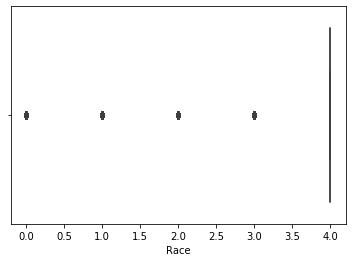

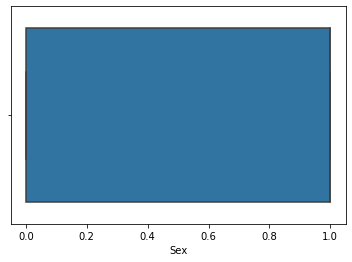

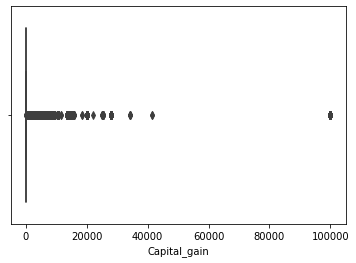

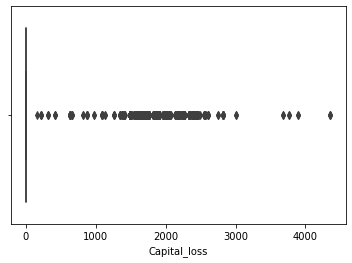

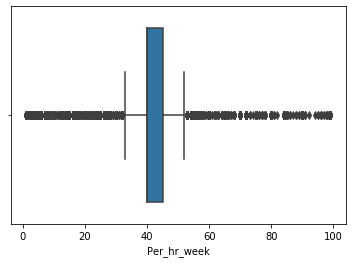

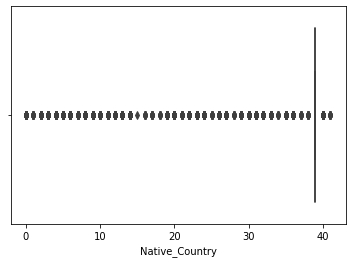

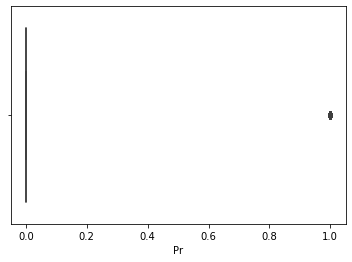

In [13]:
# Analaysis of whole data 
for i in cid.describe().columns:
    sns.boxplot(cid[i].dropna())
    plt.show()

# Finding Distribution of skewness in the data

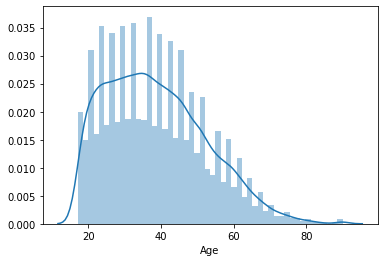

In [14]:
sns.distplot(cid['Age'])

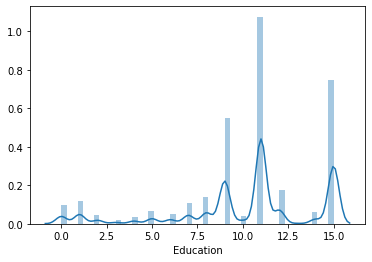

In [15]:
sns.distplot(cid['Education'])

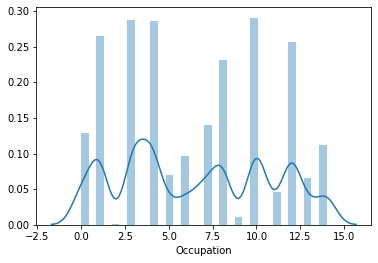

In [16]:
sns.distplot(cid['Occupation'])

In [17]:
cid.skew()

Age                0.558743
WorkClass         -0.752024
fnlwgt             1.446980
Education         -0.934042
Education_num     -0.311676
Marital_status    -0.013508
Occupation         0.114583
RalationShip       0.786818
Race              -2.435386
Sex               -0.719293
Capital_gain      11.953848
Capital_loss       4.594629
Per_hr_week        0.227643
Native_Country    -3.658303
Pr                 1.212430
dtype: float64

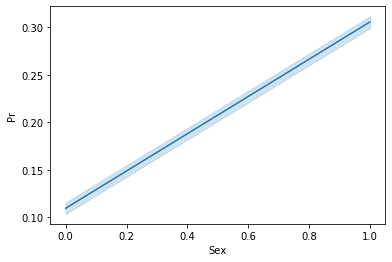

In [18]:
sns.lineplot(x='Sex',y='Pr',data=cid)

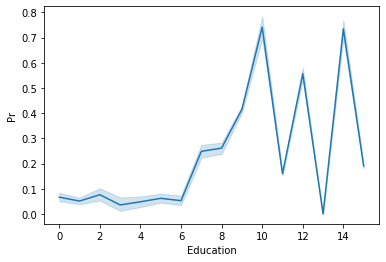

In [19]:
sns.lineplot(x='Education',y='Pr',data=cid)

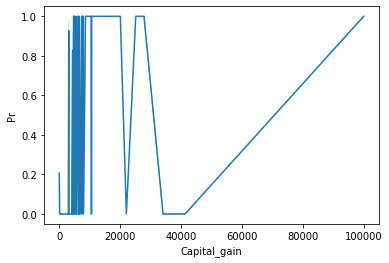

In [20]:
sns.lineplot(x='Capital_gain',y='Pr',data=cid)

# Plotting Outliers in the data set

In [21]:
collist=cid.columns.values
ncol=15
nrow=12

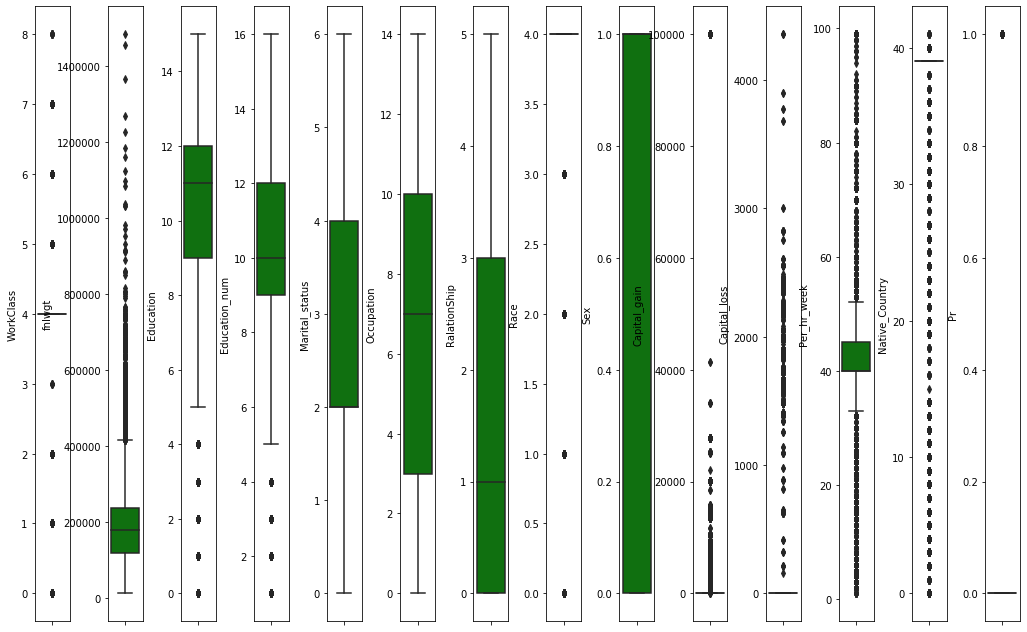

In [22]:
plt.figure(figsize=(ncol,7*ncol))
for i in range(1, len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sns.boxplot(cid[collist[i]],color='green',orient='v')
    plt.tight_layout()

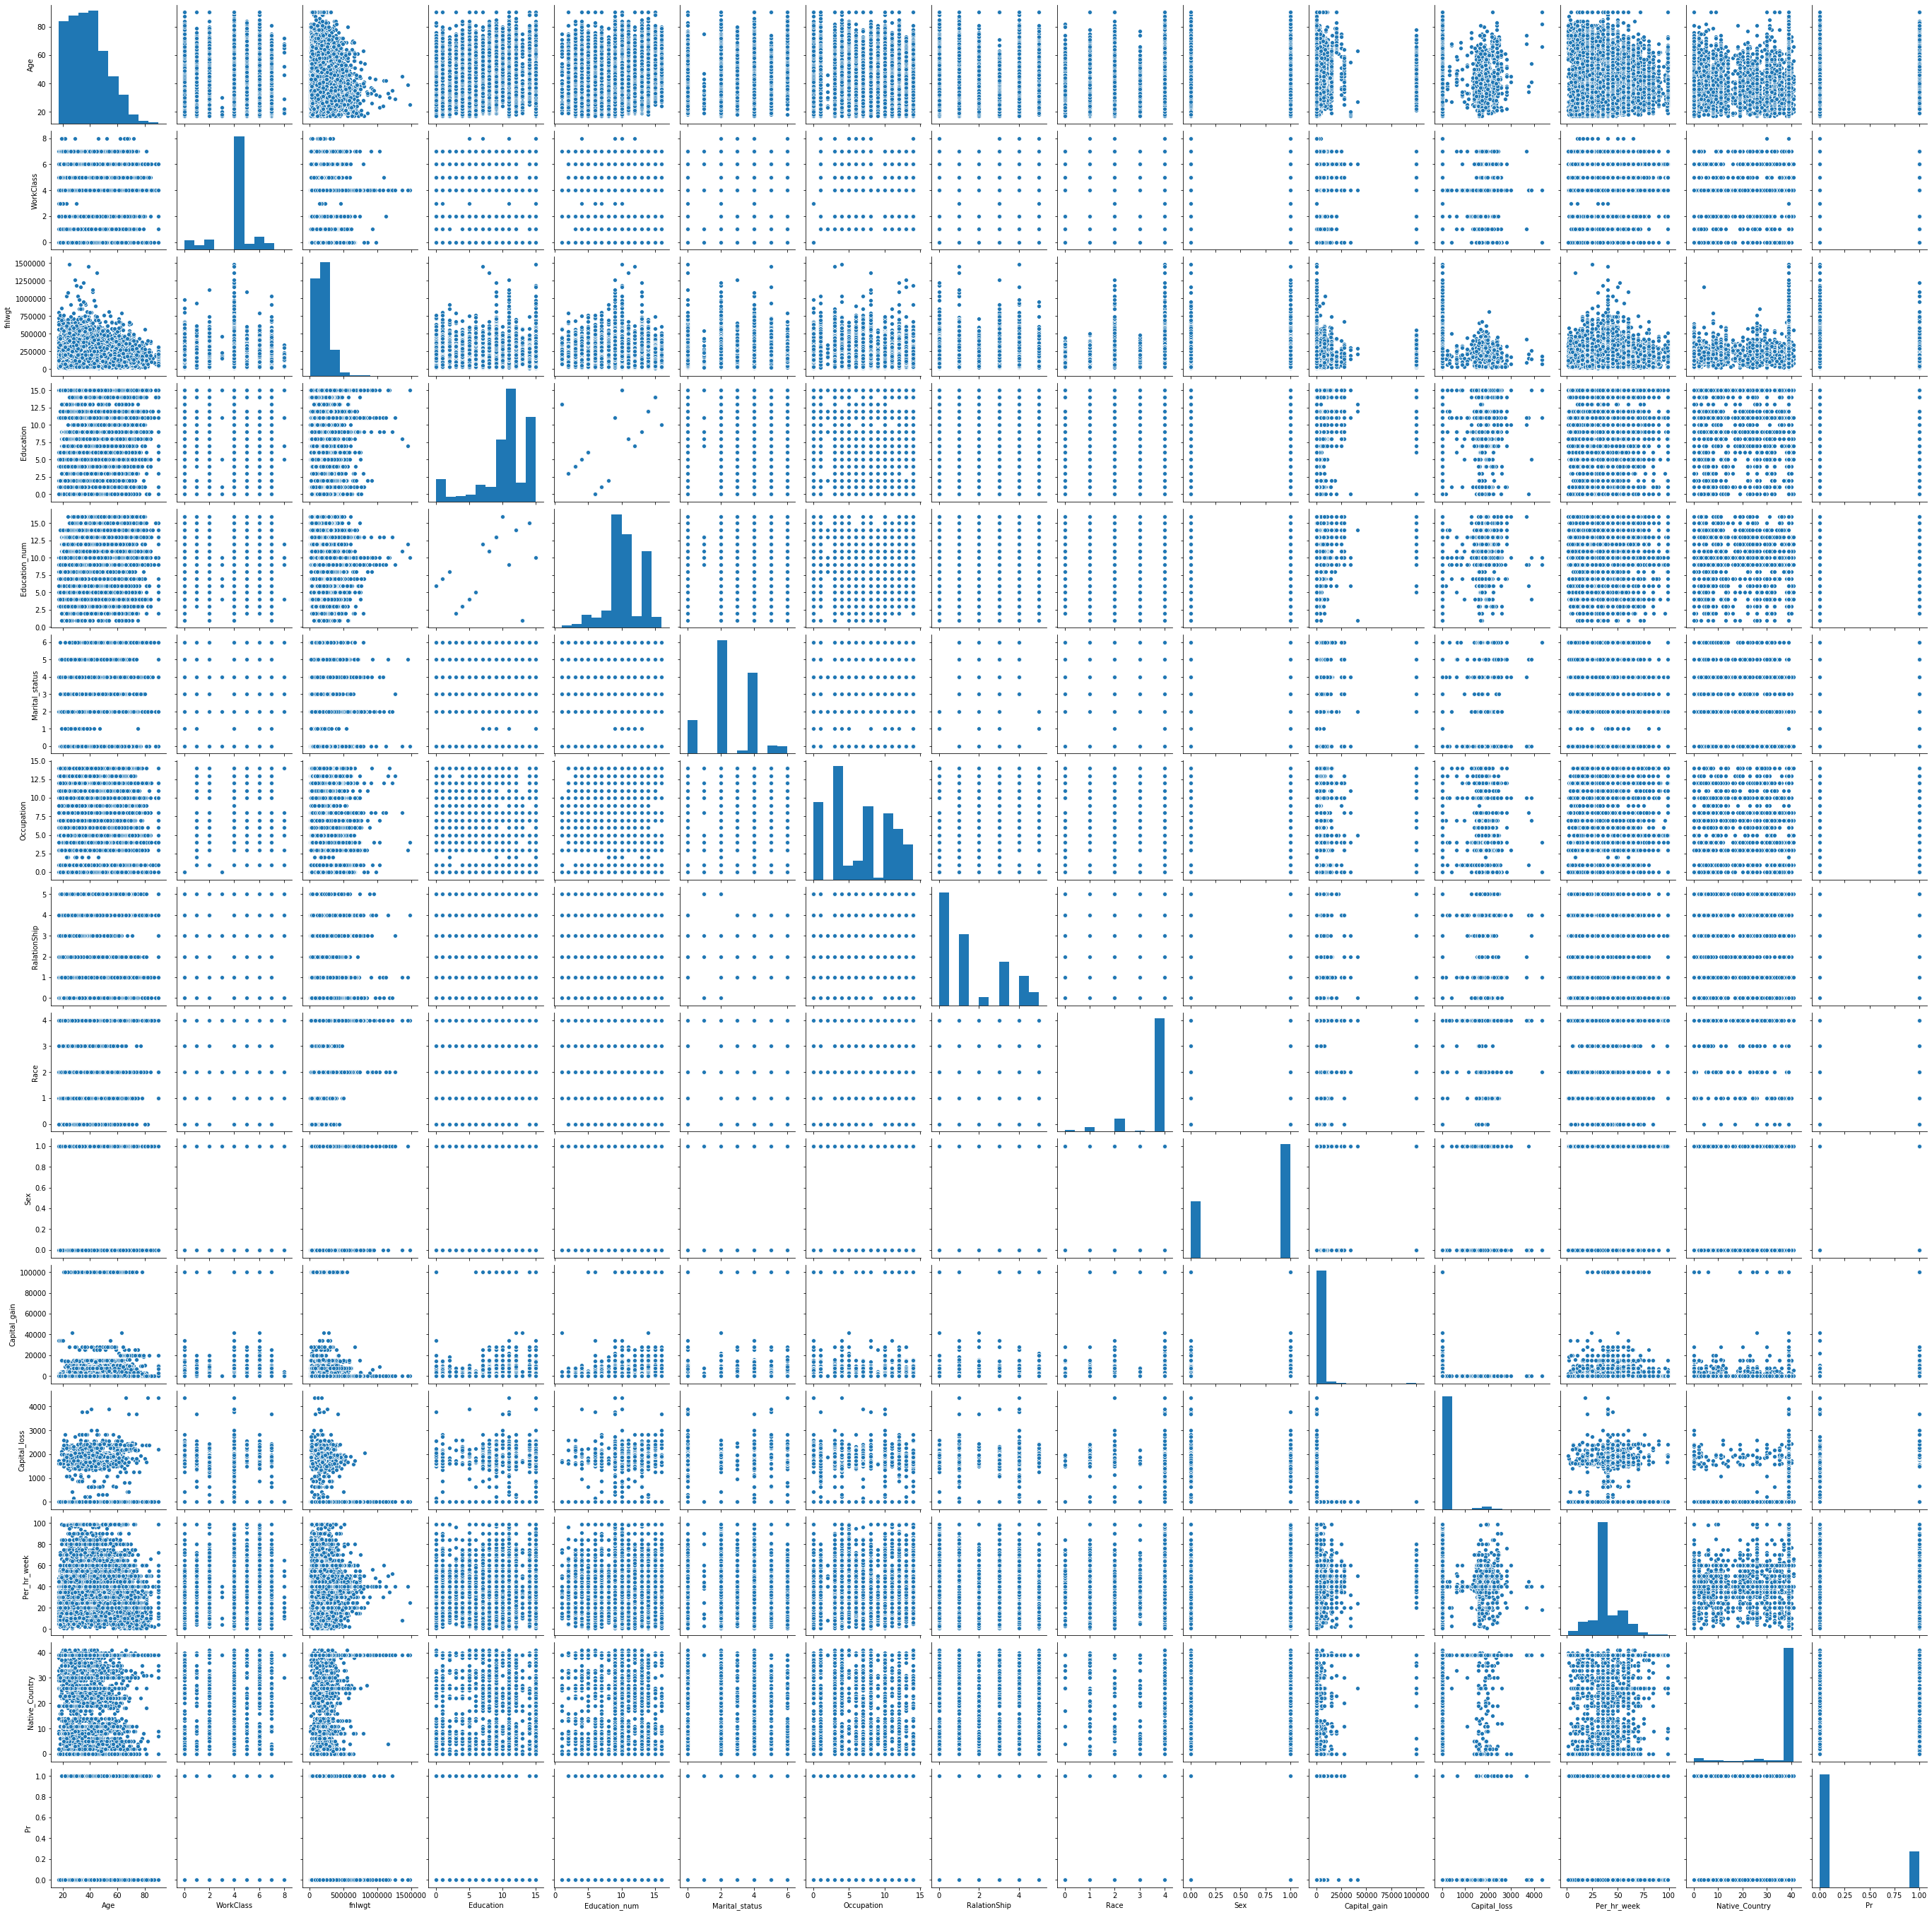

In [23]:
sns.pairplot(cid)

# Removing Outliers from the census data set

In [24]:
from scipy.stats import zscore
z=np.abs(zscore(cid))
z

array([[0.03067056, 2.15057856, 1.06361075, ..., 0.03542945, 0.29156857,
        0.56319851],
       [0.83710898, 1.46373585, 1.008707  , ..., 2.22215312, 0.29156857,
        0.56319851],
       [0.04264203, 0.09005041, 0.2450785 , ..., 0.03542945, 0.29156857,
        0.56319851],
       ...,
       [1.42360965, 0.09005041, 0.35877741, ..., 0.03542945, 0.29156857,
        0.56319851],
       [1.21564337, 0.09005041, 0.11095988, ..., 1.65522476, 0.29156857,
        0.56319851],
       [0.98373415, 0.77689313, 0.92989258, ..., 0.03542945, 0.29156857,
        1.77557289]])

In [25]:
threshold=3
print(np.where(z>3))

(array([    4,    10,    11, ..., 32533, 32551, 32553], dtype=int64), array([13, 12,  8, ...,  8,  8,  8], dtype=int64))


In [26]:
CI=cid[(z<3).all(axis=1)]
CI

,Age,WorkClass,fnlwgt,Education,Education_num,Marital_status,Occupation,RalationShip,Race,Sex,Capital_gain,Capital_loss,Per_hr_week,Native_Country,Pr
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
5,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,7,12,2,13,5,4,0,0,0,38,39,0
32557,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,1
32558,58,4,151910,11,9,6,1,4,4,0,0,0,40,39,0
32559,22,4,201490,11,9,4,1,3,4,1,0,0,20,39,0


In [27]:
print(cid.shape , CI.shape)

(32561, 15) (27418, 15)


In [28]:
CI.skew()

Age                0.483480
WorkClass         -0.737714
fnlwgt             0.626258
Education         -0.957433
Education_num     -0.144018
Marital_status    -0.044388
Occupation         0.131200
RalationShip       0.750249
Race              -2.592997
Sex               -0.684173
Capital_gain       4.934777
Capital_loss      29.326272
Per_hr_week       -0.358404
Native_Country    -5.460784
Pr                 1.324975
dtype: float64

# Splitting the data into input and output variables

In [29]:
x=CI.drop(['Pr','Race','Education'],axis=1)
x.head()

,Age,WorkClass,fnlwgt,Education_num,Marital_status,Occupation,RalationShip,Sex,Capital_gain,Capital_loss,Per_hr_week,Native_Country
0,39,7,77516,13,4,1,1,1,2174,0,40,39
1,50,6,83311,13,2,4,0,1,0,0,13,39
2,38,4,215646,9,0,6,1,1,0,0,40,39
3,53,4,234721,7,2,6,0,1,0,0,40,39
5,37,4,284582,14,2,4,5,0,0,0,40,39


In [30]:
y=CI['Pr']
y.head()

0    0
1    0
2    0
3    0
5    0
Name: Pr, dtype: int32

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(21934, 12) (5484, 12)
(21934,) (5484,)


In [32]:
from sklearn.linear_model import LogisticRegression
lgr=LogisticRegression()
lgr.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,auc

In [34]:
lgr=LogisticRegression()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()
sv=SVC()
rfc=RandomForestClassifier()
abc=AdaBoostClassifier()
gbc=GradientBoostingClassifier()
models=[]
models.append(('LogisticRegression',lgr))
models.append(('DecisionTreeClassifier',dtc))
models.append(('KNeighborsClassifier',knn))
models.append(('SVC',sv))
models.append(('RandomForestClassifier',rfc))
models.append(('AdaBoostClassifier',abc))
models.append(('GradientBoostingClassifier',gbc))

In [35]:
Model=[]
score=[]
cvs= []
rocscore=[]
for i,model in models:
    print('****************',i,'*****************','\n')
    Model.append(i)
    model.fit(x_train,y_train)
    pre=model.predict(x_test)
    AS=accuracy_score(y_test,pre)
    print('Accuracy Score is ',AS,'\n')
    score.append(AS*100)
    CM=confusion_matrix(y_test,pre)
    print('Confusion Matrix is \n',CM,'\n')
    print('Classification Report is \n',classification_report(y_test,pre),'\n')
    cs=cross_val_score(model,x,y,cv=5,scoring='accuracy').mean()
    print('Cross Validation Score is',cs,'\n')
    cvs.append(cs*100)
    fpr,tpr,thresholds=roc_curve(y_test,pre)
    roc_auc=auc(fpr,tpr)
    print('Roc Auc Score is',roc_auc,'\n')
    rocscore.append(roc_auc*100)

**************** LogisticRegression ***************** 

Accuracy Score is  0.8045222465353756 

Confusion Matrix is 
 [[4174   55]
 [1017  238]] 

Classification Report is 
               precision    recall  f1-score   support

           0       0.80      0.99      0.89      4229
           1       0.81      0.19      0.31      1255

    accuracy                           0.80      5484
   macro avg       0.81      0.59      0.60      5484
weighted avg       0.81      0.80      0.75      5484
 

Cross Validation Score is 0.8030127868208252 

Roc Auc Score is 0.5883179978124862 

**************** DecisionTreeClassifier ***************** 

Accuracy Score is  0.8063457330415755 

Confusion Matrix is 
 [[3710  519]
 [ 543  712]] 

Classification Report is 
               precision    recall  f1-score   support

           0       0.87      0.88      0.87      4229
           1       0.58      0.57      0.57      1255

    accuracy                           0.81      5484
   macro avg    

In [36]:
result=pd.DataFrame({'Model':Model,'Accuracy Score':score,'Cross Val Score':cvs,'AUC ROC Score':rocscore})
result

,Model,Accuracy Score,Cross Val Score,AUC ROC Score
0,LogisticRegression,80.452225,80.301279,58.831800
1,DecisionTreeClassifier,80.634573,80.684235,72.230331
2,KNeighborsClassifier,77.789934,78.535984,59.627199
3,SVC,80.579869,80.789994,57.569721
4,RandomForestClassifier,84.938001,85.257895,74.796449
5,AdaBoostClassifier,85.302699,85.965451,73.744106
6,GradientBoostingClassifier,86.013858,86.399457,74.989698


# we chose GradientBoostingClassifier for making the model because it gives high accuracy to our model as compared to others.
 Accuracy Score=86.013858   ,   Cross Val Score=86.399457   ,Auc Roc Score=74
    989698

In [37]:
from sklearn.externals import joblib
joblib.dump(gbc,'Census_Income.pkl')

['Census_Income.pkl']